# Exercício 8 (Cap. 1)
Baseado em "*An Introduction to Statistical Learning with Application in Python*" (Ed. 2), de Gareth James, Daniela Witten, Trevor Hastie e Rob Tibshirani.

**Recursos:** https://www.statlearning.com/resources-python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv("https://www.statlearning.com/s/College.csv")

# Renomear a coluna "Unnamed: 0" para "College" e defini-la como coluna de índices (não será tratada como dado)
data = data.rename({"Unnamed: 0": "College"}, axis=1)
data = data.set_index("College")

data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
# Descrição numérica da tabela
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


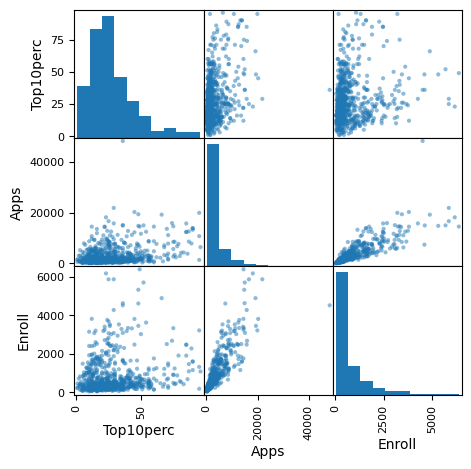

In [ ]:
# Produzir uma scatterplot matrix
pd.plotting.scatter_matrix(data[["Top10perc", "Apps", "Enroll"]], figsize=(5,5))
plt.show()

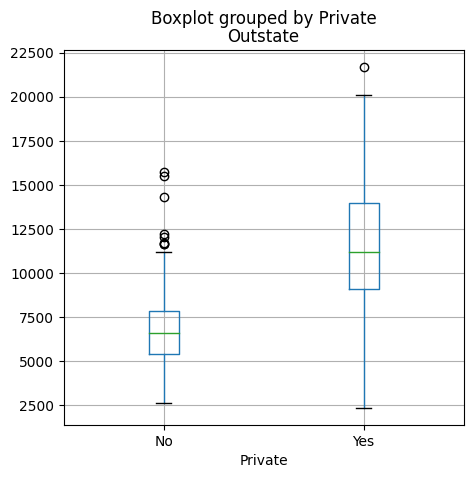

In [ ]:
# Produzindo boxplot
data.boxplot(column="Outstate", by="Private", figsize=(5,5))
plt.show()

In [ ]:
# Adicionar uma nova coluna que indique se o college é de elite ou não
# Se o número de estudantes oriundos dos 10% melhores high schools, for maior que 50% dos estudantes matriculados, então o college é de elite
data["Elite"] = pd.cut(data.Top10perc/data.Enroll, bins=[0,0.5,1], labels=["No", "Yes"])

print(data["Elite"].value_counts())

# Colleges de elite
data.loc[data["Elite"] == "Yes"][["Enroll", "Top10perc", "Elite"]]

No     775
Yes      2
Name: Elite, dtype: int64


,Enroll,Top10perc,Elite
College,,,
Christendom College,51,33,Yes
Harvey Mudd College,178,95,Yes


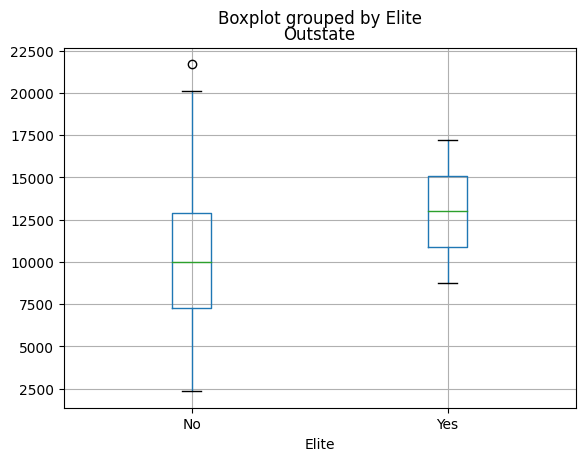

In [ ]:
data.boxplot(column="Outstate", by="Elite")
plt.show()